# Code2Vec
Sean Wade

1. input layer, one hot layer
2. hidden layer (linear (identity)
3. output layer (softmax)

In [1]:
from __future__ import division, print_function
from health.codes import *
from health import find_codes
import gensim

In [2]:
model = gensim.models.Word2Vec.load('code2vec.p')

In [3]:
def find_similar(in_code):
    if in_code not in model:
        print("Code not in training set...")
        return
    
    print("[%s] %s" % (in_code, icd2desc[in_code]))
    print("-"*30)
    results = model.most_similar(positive=[in_code])
    for code, desc in results:
        try:
            print("[%s] " % code, icd2desc[code][:40], desc)
        except: pass

### Most Similar Codes

In [4]:
find_similar('34430')

[34430] Monoplegia of lower limb affecting unspecified side
------------------------------
[3369]  Unspecified disease of spinal cord 0.773293316364
[3449]  Paralysis, unspecified 0.761551678181
[09489]  Other specified neurosyphilis 0.75483417511
[7814]  PERIOST SUT-METACAR/CAR (Begin 1991) 0.743457555771
[3570]  HEART SEPTA REPAIR NOS 0.735608577728
[99675]  Other complications due to nervous syste 0.733783721924
[3368]  Other myelopathy 0.730498969555
[72141]  Spondylosis with myelopathy, thoracic re 0.720960080624
[43884]  Other late effects of cerebrovascular di 0.719599127769
[3578]  Inflammatory and toxic neuropathy - Othe 0.715212225914


In [5]:
find_similar('99565')

[99565] Anaphylactic shock due to fish
------------------------------
[99562]  Anaphylactic shock due to crustaceans 0.756537437439
[9953]  ARBOVIRUS ENCEPH VACCIN 0.747067093849
[9957]  BOTULISM ANTITOXIN ADMIN 0.742300629616
[99560]  Anaphylactic shock due to unspecified fo 0.74084764719
[9950]  Other anaphylactic shock, not elsewhere  0.736726045609
[99561]  Anaphylactic shock due to peanuts 0.731634140015
[6931]  Dermatitis due to food taken internally 0.697154641151
[99527]  Other drug allergy 0.671091079712
[99564]  Anaphylactic shock due to tree nuts and  0.660813808441
[7080]  Allergic urticaria 0.61965829134


In [6]:
find_similar('78052')

[78052] Insomnia, unspecified
------------------------------
[30742]  Persistent disorder of initiating or mai 0.601093709469
[78079]  Other malaise and fatigue 0.558987975121
[78050]  Sleep disturbance, unspecified 0.519410610199
[3080]  Predominant disturbance of emotions 0.518715322018
[78054]  Hypersomnia, unspecified 0.507867455482
[7805]  BONE GRAFT TO FEMUR 0.499624609947
[3089]  Unspecified acute reaction to stress 0.490030139685
[33399]  Other extrapyramidal diseases and abnorm 0.48095291853
[33394]  Restless legs syndrome (RLS) 0.471392869949
[30000]  Anxiety state, unspecified 0.460547029972


In [7]:
find_similar('24900')

[24900] Secondary diabetes mellitus without mention of complication, not stated as uncontrolled, or unspecified
------------------------------
[36206]  Severe nonproliferative diabetic retinop 0.716771841049
[36204]  Mild nonproliferative diabetic retinopat 0.697458744049
[25020]  Diabetes with hyperosmolarity, type II o 0.695071220398
[25023]  Diabetes with hyperosmolarity, type I [j 0.688840985298
[25012]  Diabetes with ketoacidosis, type II or u 0.677049994469
[25021]  Diabetes with hyperosmolarity, type I [j 0.657078564167
[36203]  Nonproliferative diabetic retinopathy NO 0.648167490959


In [288]:
find_similar('9490')

[9490] Burn of unspecified site, unspecified degree
------------------------------
[94400]  Burn of unspecified degree of hand, unsp 0.821710586548
[94100]  Burn of unspecified degree of face and h 0.815165042877
[94800]  Burn [any degree] involving less than 10 0.793270528316
[94203]  Burn of unspecified degree of abdominal  0.792121052742
[94401]  Burn of unspecified degree of single dig 0.787130832672
[94120]  Blisters, epidermal loss [second degree] 0.782836019993
[94506]  Burn of unspecified degree of thigh [any 0.767872273922
[9461]  ALCOHOL REHABILITATION (Begin 1989) 0.763352513313
[94428]  Blisters, epidermal loss [second degree] 0.760929524899
[94222]  Blisters, epidermal loss [second degree] 0.760725438595


### Relations Between Codes

In [289]:
results = model.most_similar(positive=['94504'], negative=['33394','34430'])
for code, desc in results:
    if code in icd2desc:
        print("[%s] " % code, icd2desc[code], desc)

[V201]  Other healthy infant or child receiving care 0.466313809156
[94500]  Burn of unspecified degree of lower limb [leg], unspecified site 0.463710725307
[37239]  Other conjunctivitis 0.456536054611
[75249]  Other anomalies of cervix, vagina, and external female genitalia 0.454389512539
[37530]  Dacryocystitis, unspecified 0.453188866377
[V181]  fm hx-endo/metab dis nec 0.452681839466
[6232]  Stricture or atresia of vagina 0.451912820339
[94524]  Blisters, epidermal loss [second degree] of lower leg 0.451757371426
[9116]  CELL BLK/PAP-PERITONEUM 0.433939963579
[94100]  Burn of unspecified degree of face and head, unspecified site 0.43359580636


### Anomaly Detection

In [20]:
# 8789 FEMALE GENITAL X-RAY NEC
# 62920 Female genital mutilation status, unspecified
# 30274 Male orgasmic disorder
# 6281 Infertility, female, of pituitary-hypothalamic origin

outlier = model.doesnt_match("8789 62920 30274 6281".split())
print("Outlier: %s" % icd2desc[outlier])

Outlier: Male orgasmic disorder


In [21]:
# 88023 Open wound of upper arm, with tendon involvement
# 73092 Unspecified infection of bone, upper arm
# 25260 Repair, tendon or muscle, flexor, forearm and/or wrist; primary, single, each tendon or muscle
# 73006 Acute osteomyelitis, lower leg

outlier = model.doesnt_match("88023 73092 25260 73006".split())
print("Outlier: %s" % icd2desc[outlier])

Outlier: Acute osteomyelitis, lower leg


In [10]:
# 99683 Complications of transplanted heart
# V151 Personal history of surgery to heart and great vessels, presenting hazards to health
# 40200 Malignant hypertensive heart disease without heart failure
# 83806 Closed dislocation of interphalangeal (joint), foot

outlier = model.doesnt_match("99683 V151 1904 83806".split())
print("Outlier: %s" % icd2desc[outlier])

Outlier: Closed dislocation of interphalangeal (joint), foot



### Disease Similarity Score

In [11]:
model.similarity('9957', '99564')

0.70168022983256595

### Visualize

In [14]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
py.sign_in('smwade', "a8zcz2zggpeP7MhyykAS")
% matplotlib inline

In [15]:
# break the codes into CCS groups
data = np.ones(100)
ccs_label = []
icd_label = []
for x in model.wv.index2word:
    try:
        ccs_label.append(icd2ccs[x])
        icd_label.append(x)
        data = np.vstack((data, model[x]))
    except:
        pass
ccs_label = np.array(ccs_label)
icd_label = np.array(icd_label)
data = data[1:,:]

In [249]:
pca = PCA(n_components=2)
pca_points = pca.fit_transform(data)

In [19]:
tsne = TSNE(n_components=2, learning_rate=200)
tsne_points = tsne.fit_transform(data)

In [24]:
results = find_codes('','ccs')
plot_labels = results.keys()
plot_labels = ['240', '037', '108', '105','235','149','011']

In [25]:
points = tsne_points
data_sources = []
for l in plot_labels:
    color = iter(plt.cm.rainbow(np.linspace(0,1,len(plot_labels))))
    data_sources.append(Scatter(
    name=ccs2desc[l],
    x=points[ccs_label == l][:,0],
    y=points[ccs_label == l][:,1],
    mode='markers',
    marker=Marker(
        size=5,
        color=next(color)[0],
        opacity=1,
    ),
    #text=[icd2ccs[x] for x in icd_label[ccs_label == l]],
    text=[icd2desc[x] for x in icd_label[ccs_label == l]],
    #text=icd_label[ccs_label == l],      
    hoverinfo='text',
    visible='true'
    ))

source = Data(data_sources)

layout = Layout(
title="ICD9 Codes",
autosize=True,
hovermode='closest',
)

fig = dict(data=source, layout=layout)
py.iplot(fig, filename='code2vec_tsne_groups', validate=False)

### Visualize Relations

In [32]:
icd2point = {}
for code, val in zip(icd_label, tsne_points):
    icd2point[code] = val

In [33]:
def icd_points(codes):
    if isinstance(codes, list):
        return np.array([icd2point[x] for x in codes])
    else:
        return icd2point[codes]

In [34]:
pos = ['83906']
neg = ['1990']
print("Positive: {}".format([icd2desc[x] for x in pos]))
print("Negative: {}".format([icd2desc[x] for x in neg]))
print("-"*40)

results = model.most_similar(positive=pos, negative=neg)
rel_points = []
for code, desc in results:
    if code in icd2desc:
        print("[%s] " % code, icd2desc[code][:60], desc)
        rel_points.append(icd_points(code))
        
rel_points = np.array(rel_points)

Positive: [u'Closed dislocation, sixth cervical vertebra']
Negative: [u'Disseminated malignant neoplasm without specification of site']
----------------------------------------
[V017]  viral dis contact nec 0.414492070675
[V0189]  Contact with or exposure to other communicable diseases 0.374367386103
[46400]  Acute laryngitis without mention of obstruction 0.353141844273
[4789]  Other and unspecified diseases of upper respiratory tract 0.348423182964
[4658]  Acute upper respiratory infections of other multiple sites 0.3477216959
[9180]  Superficial injury of eyelids and periocular area 0.345269441605
[92233]  contusn of interscapular region 0.341302543879
[37251]  Pinguecula 0.334330111742
[2245]  Benign neoplasm of retina 0.333713173866
[9301]  FUNCTIONAL PT EVALUATION 0.325109511614


In [35]:
pos_points = icd_points(pos)
neg_points = icd_points(neg)

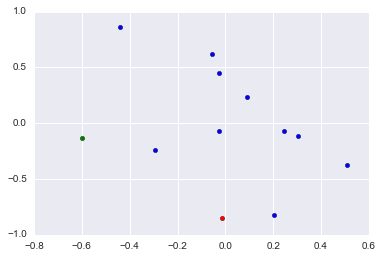

In [36]:
plt.scatter(rel_points[:,0],rel_points[:,1])
plt.scatter(pos_points[:,0], pos_points[:,1], c='g')
plt.scatter(neg_points[:,0], neg_points[:,1], c='r')
plt.show()

### Plot an Individuals History

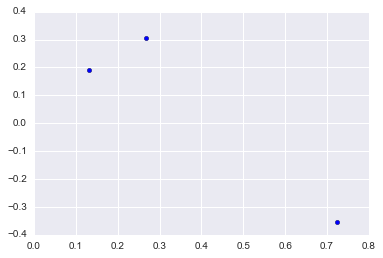

In [37]:
personal_history = ['V700','V0481','4660']
points = icd_points(personal_history)
plt.scatter(points[:,0], points[:,1])
plt.show()